In [38]:
  import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
df = pd.read_csv("data/Results_Master.csv")


df["Time used in seconds"] = pd.to_numeric(df["Time used in seconds"])
df["Memory used in MB"] = pd.to_numeric(df["Memory used in MB"])
df["Amount of MAIDS"] = pd.to_numeric(df["Amount of MAIDS"])
df["Amount of Polygons"] = pd.to_numeric(df["Amount of Polygons"])
df["Combined_Method"] = df["Method"].str.cat(df["Spatial Accuracy (Resolution)"], sep="_")

df["Time per Polygon"] = df["Time used in seconds"]/df["Amount of Polygons"]
df["Time per MAID"] = df["Time used in seconds"]/df["Amount of MAIDS"]
df["Memory per Polygon"] = df["Memory used in MB"]/df["Amount of Polygons"]
df["Memory per MAID"] = df["Memory used in MB"]/df["Amount of MAIDS"]



In [91]:
display(df) 

,Index,Method,Spatial Accuracy (Resolution),Amount of MAIDS,Amount of Polygons,Time used in seconds,Memory used in MB,Precision,Recall,F1,Jaccard Index,Effectiveness,N_Matches,Combined_Method,Time per Polygon,Time per MAID,Memory per Polygon,Memory per MAID
0,1,Shapely,0.7m (5 Decimals),10000,1,2.1300,567.31,0.000000,0.000000,0.000000,0.000000,NaN,0 out of 10000 points,Shapely_0.7m (5 Decimals),2.130000,0.000213,567.3100,0.056731
1,2,Shapely,0.7m (5 Decimals),10000,10,7.5760,568.94,1.000000,1.000000,1.000000,1.000000,NaN,1 out of 10000 points,Shapely_0.7m (5 Decimals),0.757600,0.000758,56.8940,0.056894
2,3,Shapely,0.7m (5 Decimals),10000,100,6.8680,297.81,1.000000,1.000000,1.000000,1.000000,NaN,24 out of 10000 points,Shapely_0.7m (5 Decimals),0.068680,0.000687,2.9781,0.029781
3,4,Shapely,0.7m (5 Decimals),100000,1,0.9952,577.72,0.000000,0.000000,0.000000,0.000000,NaN,0 out of 100000 points,Shapely_0.7m (5 Decimals),0.995200,0.000010,577.7200,0.005777
4,5,Shapely,0.7m (5 Decimals),100000,10,6.6264,518.67,1.000000,1.000000,1.000000,1.000000,NaN,4 out of 100000 points,Shapely_0.7m (5 Decimals),0.662640,0.000066,51.8670,0.005187
5,6,Shapely,0.7m (5 Decimals),100000,100,63.5621,359.14,1.000000,1.000000,1.000000,1.000000,NaN,221 out of 100000 points,Shapely_0.7m (5 Decimals),0.635621,0.000636,3.5914,0.003591
6,7,Shapely,0.7m (5 Decimals),1000000,1,9.3067,1711.95,0.000000,0.000000,0.000000,0.000000,NaN,0 matches,Shapely_0.7m (5 Decimals),9.306700,0.000009,1711.9500,0.001712
7,8,Shapely,0.7m (5 Decimals),1000000,10,65.0597,1430.28,1.000000,1.000000,1.000000,1.000000,NaN,61 out of 1000000 points,Shapely_0.7m (5 Decimals),6.505970,0.000065,143.0280,0.001430
8,9,Shapely,0.7m (5 Decimals),1000000,100,638.6738,1444.80,1.000000,1.000000,1.000000,1.000000,NaN,NaN,Shapely_0.7m (5 Decimals),6.386738,0.000639,14.4480,0.001445
9,10,Shapely,7m (4 Decimals),10000,1,0.2135,567.05,0.000000,0.000000,0.000000,0.000000,NaN,0 out of 10000 points,Shapely_7m (4 Decimals),0.213500,0.000021,567.0500,0.056705


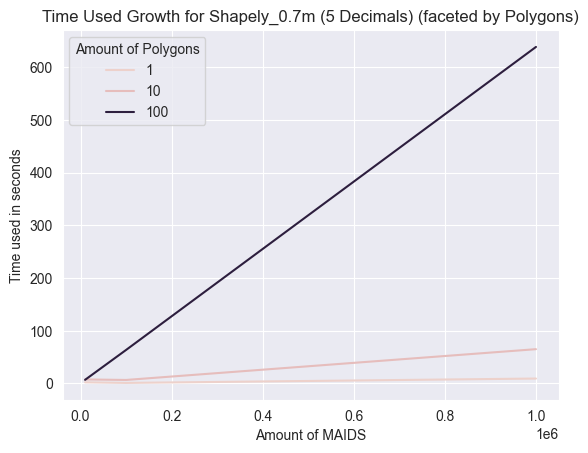

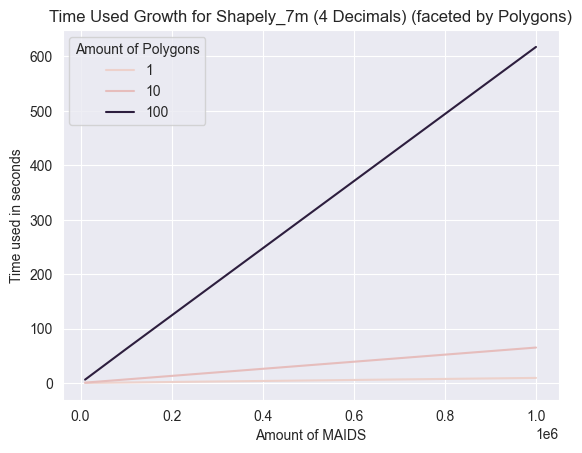

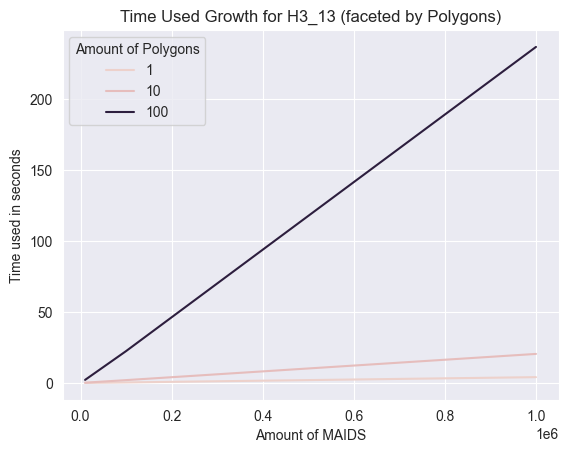

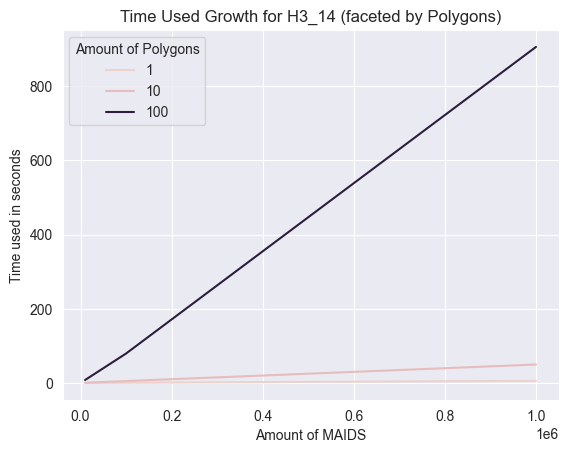

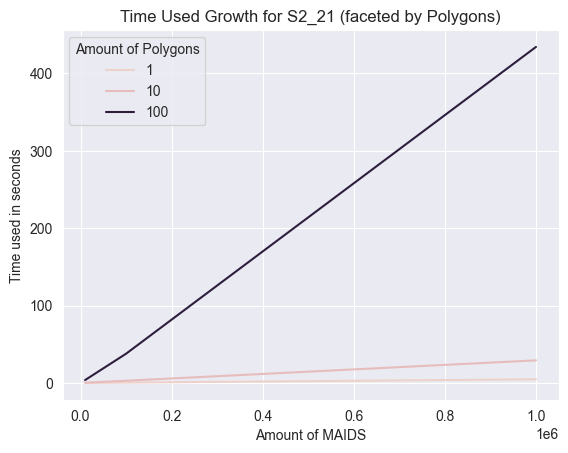

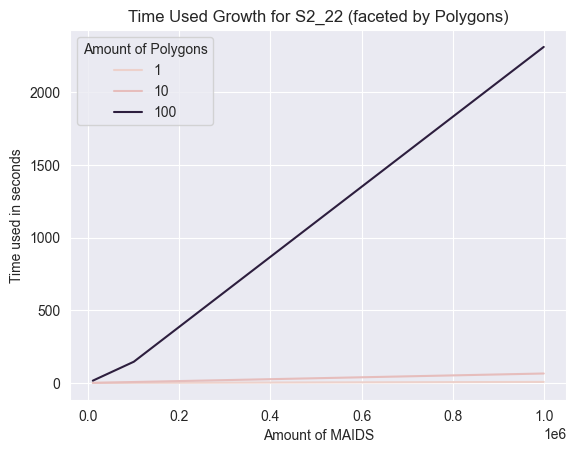

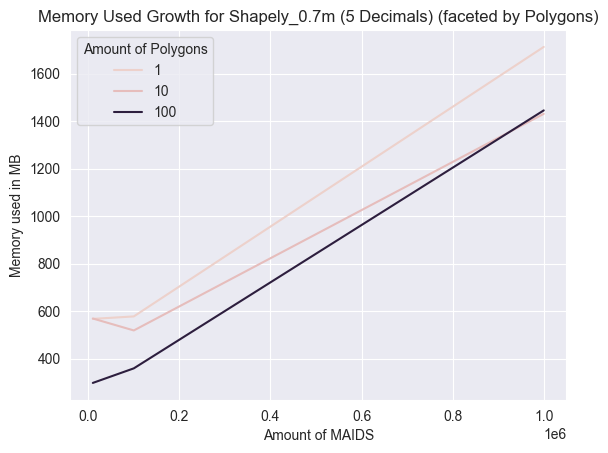

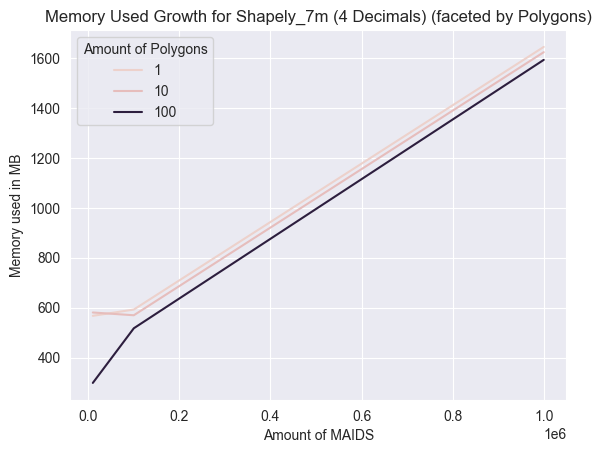

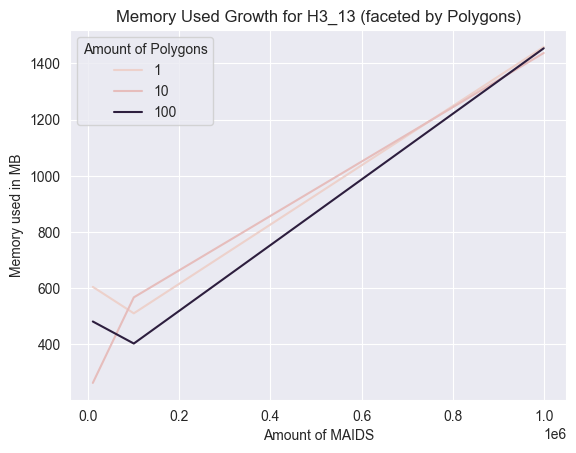

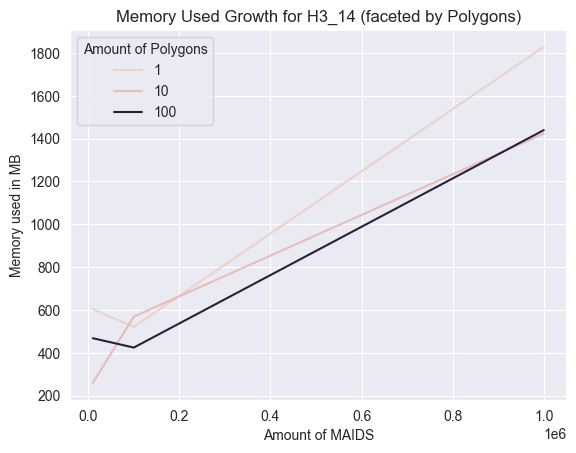

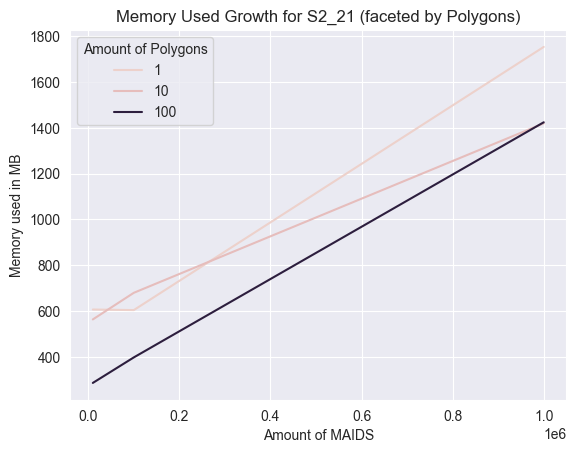

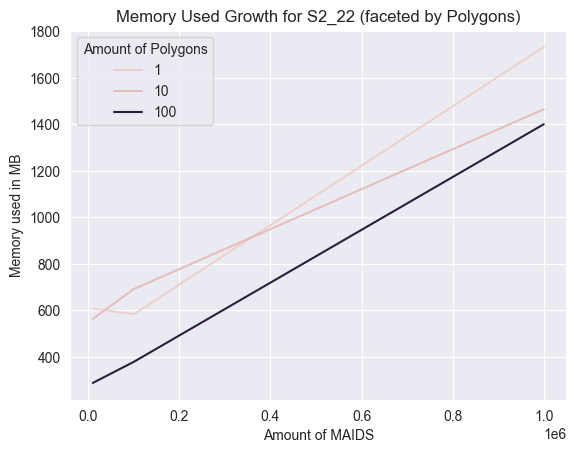

In [92]:
def plot_growth_seaborn(method, x_col, y_col, title):
  df_method = df[df["Combined_Method"] == method]
  sns.lineplot(x=x_col, y=y_col, hue="Amount of Polygons", data=df_method)
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.title(title)
  plt.legend(title="Amount of Polygons")
  plt.show()

# Analyze time vs. maid count (faceted by polygons)
for method in df["Combined_Method"].unique():
  plot_growth_seaborn(method, "Amount of MAIDS", "Time used in seconds", f"Time Used Growth for {method} (faceted by Polygons)")

# Analyze memory vs. maid count (faceted by polygons)
for method in df["Combined_Method"].unique():
  plot_growth_seaborn(method, "Amount of MAIDS", "Memory used in MB", f"Memory Used Growth for {method} (faceted by Polygons)")

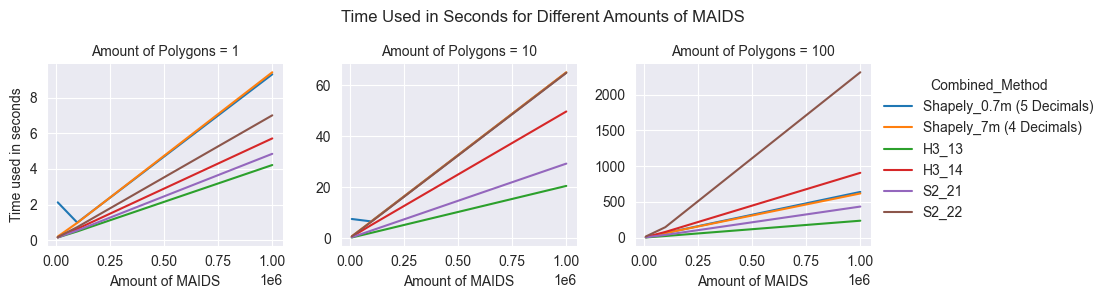

In [93]:
poly_values = [1, 10, 100]

g = sns.FacetGrid(df, col="Amount of Polygons", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of MAIDS", "Time used in seconds")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Time Used in Seconds for Different Amounts of MAIDS')
g.add_legend()
plt.show()

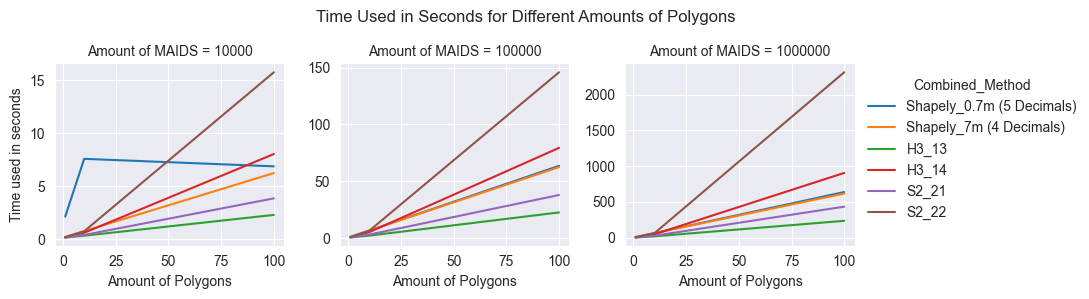

In [94]:
maids_values = [10000, 100000, 1000000]

g = sns.FacetGrid(df, col="Amount of MAIDS", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of Polygons", "Time used in seconds")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Time Used in Seconds for Different Amounts of Polygons')
g.add_legend()
plt.show()

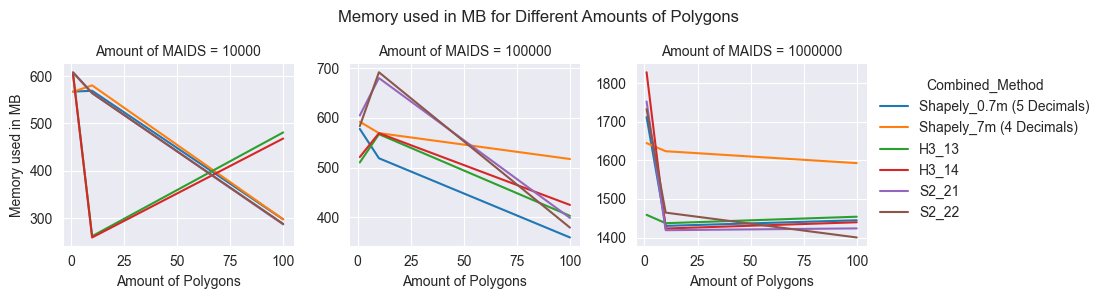

In [95]:
maids_values = [10000, 100000, 1000000]

g = sns.FacetGrid(df, col="Amount of MAIDS", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of Polygons", "Memory used in MB")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Memory used in MB for Different Amounts of Polygons')
g.add_legend()
plt.show()

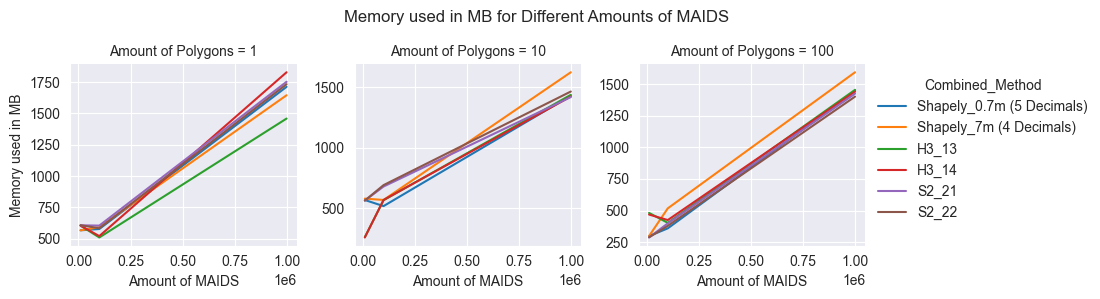

In [96]:
poly_values = [1, 10, 100]

g = sns.FacetGrid(df, col="Amount of Polygons", hue="Combined_Method", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Amount of MAIDS", "Memory used in MB")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Memory used in MB for Different Amounts of MAIDS')
g.add_legend()
plt.show()